# Example : Predicting teacher's mood

**Problem statement :**

In the context of predicting a teacher's mood, the goal is to leverage HMMs to forecast the teacher's emotional state based on the observed t-shirt colors worn on consecutive days.

### Step 1: Import the required libraries

In [29]:
!pip install hmmlearn

In [41]:
# import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm

In [42]:
np.set_printoptions(precision=4)

### Step 2: Define the model parameters

In [43]:
# Define the state space
states = ["Happy", "Sad"]
n_states = len(states)
print('Number of hidden states :',n_states)

# Define the observation space
observations = ["Red", "Green", "Blue"]
n_observations = len(observations)
print('Number of observations :',n_observations)

Number of hidden states : 2
Number of observations : 3


### Step 3: Create an instance of the HMM model

In [44]:
model = hmm.CategoricalHMM(n_components=n_states, n_features=n_observations, algorithm='viterbi')

### Step 4: Train the model

In [45]:
# Define the sequence of observations
train_observations_sequence = np.array([1, 2, 1, 1, 0, 1, 0, 2, 2 , 1, 0]).reshape(-1, 1) 
train_observations_sequence

array([[1],
       [2],
       [1],
       [1],
       [0],
       [1],
       [0],
       [2],
       [2],
       [1],
       [0]])

In [46]:
model.fit(train_observations_sequence)

Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'


CategoricalHMM(n_components=2, n_features=3,
               random_state=RandomState(MT19937) at 0x1CE449D7B40)

In [47]:
model.startprob_,model.transmat_, model.emissionprob_ #the result of fitting the model, PS: if you already know these values you can skip the fitting and pass directly to prediction

(array([9.9986e-01, 1.4360e-04]),
 array([[0.1919, 0.8081],
        [0.7087, 0.2913]]),
 array([[0.0064, 0.8151, 0.1785],
        [0.5237, 0.1149, 0.3615]]))

### Step 5: Predict the most likely sequence of hidden states

In [48]:
test_observations_sequence = np.array([1, 0, 2, 1, 1, 1]).reshape(-1, 1)  # ["Green", "Red", "Blue", "Green", "Green", "Green", "Green"]

In [49]:
# Predict the most likely sequence of hidden states
hidden_states = model.predict(test_observations_sequence)
print("Most likely hidden states:", [states[i] for i in hidden_states])

Most likely hidden states: ['Happy', 'Sad', 'Sad', 'Happy', 'Sad', 'Happy']


In [50]:
#the same result as predict but with the Log probability also
log_probability, hidden_states = model.decode(test_observations_sequence,
											                        lengths = len(test_observations_sequence),
											                        algorithm ='viterbi' ) # Decoding using the Viterbi algorithme

print('Log Probability :', log_probability)
print("Most likely hidden states:", [states[i] for i in hidden_states])

Log Probability : -6.790268700883583
Most likely hidden states: ['Happy', 'Sad', 'Sad', 'Happy', 'Sad', 'Happy']


### Step 6: Plot the results

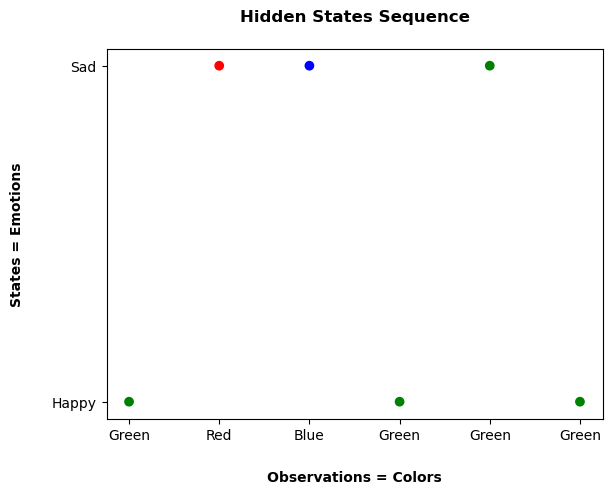

In [51]:
# Define a mapping between numeric observations and emotions / colors
emotion_mapping = {0: 'Happy', 1: 'Sad'}
color_mapping = {0: 'Red', 1: 'Green', 2: 'Blue'}

# Map numeric observations to corresponding emotions / colors
emotions = [emotion_mapping[state] for state in hidden_states]
colors = [color_mapping[obs] for obs in test_observations_sequence.flatten()]

# Plot the results
plt.scatter(range(len(hidden_states)), emotions, c=colors, marker='o')
plt.xticks(range(len(hidden_states)), colors)
plt.xlabel('Observations = Colors', labelpad=20, weight='bold')
plt.ylabel('States = Emotions', labelpad=20, weight='bold')
plt.title("Hidden States Sequence", pad=20, weight='bold')
plt.show()